# Part I - WeatherPy

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key as api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Cities List

In [45]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

# Requests API Calls

In [7]:
# Example of API call
# https://openweathermap.org/appid

In [46]:
# Initial query URL

url = "http://api.openweathermap.org/data/2.5/weather?"

# Farenheit Temperature

units = "imperial" 

# Query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Response for one city (testing the API)
# response = requests.get(query_url + "bayan").json()
# response

In [47]:
# IF YOU WANT TO RESET THE LISTS run this cell

city_id = []
city_name = []
city_latitude = []
city_longitude = []
city_country = []
city_temperature = []
city_max_temperature = []
city_humidity = []
city_cloudiness = []
city_wind_speed = []

In [48]:
# Lists of the city characteristics
# Retrieve all information from the Web into lists

city_id = []
city_name = []
city_latitude = []
city_longitude = []
city_country = []
city_temperature = []
city_max_temperature = []
city_humidity = []
city_cloudiness = []
city_wind_speed = []

# Set count and city count
city_number = 1
city_set = 1

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        response_weather = requests.get(query_url + city).json()
        print(f"Processing Record {city_number} of Set {city_set} | {city}")
        # city_name
        city_name.append(response_weather["name"])
        # city_id
        city_id.append(response_weather["id"])
        # longitude
        city_longitude.append(response_weather["coord"]["lon"])
        # latitude
        city_latitude.append(response_weather["coord"]["lat"])
        # country
        city_country.append(response_weather["sys"]["country"])
        # temperature
        city_temperature.append(response_weather["main"]["temp"])
        # max temperature
        city_max_temperature.append(response_weather["main"]["temp_max"])
        # humidity
        city_humidity.append(response_weather["main"]["humidity"])
        # cloudiness
        city_cloudiness.append(response_weather["clouds"]["all"])
        # wind_speed
        city_wind_speed.append(response_weather["wind"]["speed"])
        
    except (KeyError, IndexError):
        print("City not found...Skipping")
        
    city_number += 1
    
    if city_number == 51:
        city_number = 0
        city_set += 1

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | rondonopolis
Processing Record 2 of Set 1 | banjar
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | ko samui
Processing Record 5 of Set 1 | janow lubelski
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | taolanaro
City not found...Skipping
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | wana
Processing Record 11 of Set 1 | mys shmidta
City not found...Skipping
Processing Record 12 of Set 1 | biograd na moru
Processing Record 13 of Set 1 | bloemfontein
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | provideniya
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | ostrovnoy
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | fortuna
Processing Record 21 of Set 1 | minnedosa
Processing Record 2

Processing Record 37 of Set 4 | norman wells
Processing Record 38 of Set 4 | matara
Processing Record 39 of Set 4 | malakal
Processing Record 40 of Set 4 | say
Processing Record 41 of Set 4 | pangody
Processing Record 42 of Set 4 | balaka
Processing Record 43 of Set 4 | avarua
Processing Record 44 of Set 4 | pathein
Processing Record 45 of Set 4 | long beach
Processing Record 46 of Set 4 | tsihombe
City not found...Skipping
Processing Record 47 of Set 4 | hasaki
Processing Record 48 of Set 4 | correntina
Processing Record 49 of Set 4 | gilazi
City not found...Skipping
Processing Record 50 of Set 4 | yining
Processing Record 0 of Set 5 | constitucion
Processing Record 1 of Set 5 | barela
Processing Record 2 of Set 5 | ribeira grande
Processing Record 3 of Set 5 | bochov
Processing Record 4 of Set 5 | palabuhanratu
City not found...Skipping
Processing Record 5 of Set 5 | astoria
Processing Record 6 of Set 5 | north bend
Processing Record 7 of Set 5 | zhicheng
Processing Record 8 of Set 5

Processing Record 22 of Set 8 | te anau
Processing Record 23 of Set 8 | guerrero negro
Processing Record 24 of Set 8 | nantucket
Processing Record 25 of Set 8 | prince rupert
Processing Record 26 of Set 8 | sitka
Processing Record 27 of Set 8 | tyler
Processing Record 28 of Set 8 | korla
Processing Record 29 of Set 8 | karkaralinsk
City not found...Skipping
Processing Record 30 of Set 8 | port blair
Processing Record 31 of Set 8 | tiznit
Processing Record 32 of Set 8 | khani
Processing Record 33 of Set 8 | georgetown
Processing Record 34 of Set 8 | porto novo
Processing Record 35 of Set 8 | poum
Processing Record 36 of Set 8 | rena
Processing Record 37 of Set 8 | lenger
Processing Record 38 of Set 8 | lebyazhye
Processing Record 39 of Set 8 | vilcun
Processing Record 40 of Set 8 | goderich
Processing Record 41 of Set 8 | labutta
City not found...Skipping
Processing Record 42 of Set 8 | guacimo
Processing Record 43 of Set 8 | longyearbyen
Processing Record 44 of Set 8 | bethel
Processin

Processing Record 9 of Set 12 | gazanjyk
Processing Record 10 of Set 12 | shelburne
Processing Record 11 of Set 12 | fairview
Processing Record 12 of Set 12 | malanje
Processing Record 13 of Set 12 | namibe
Processing Record 14 of Set 12 | teguise
Processing Record 15 of Set 12 | davila
Processing Record 16 of Set 12 | tucano
Processing Record 17 of Set 12 | barbar
City not found...Skipping
Processing Record 18 of Set 12 | dengzhou
Processing Record 19 of Set 12 | lubao
Processing Record 20 of Set 12 | pokaran
Processing Record 21 of Set 12 | galiwinku
City not found...Skipping
Processing Record 22 of Set 12 | south sioux city
Processing Record 23 of Set 12 | tosya
Processing Record 24 of Set 12 | nioro
Processing Record 25 of Set 12 | sao miguel
Processing Record 26 of Set 12 | canon city
Processing Record 27 of Set 12 | virginia beach
Processing Record 28 of Set 12 | teya
Processing Record 29 of Set 12 | birin
Processing Record 30 of Set 12 | atar
Processing Record 31 of Set 12 | asp

In [49]:
print(f"There are {city_set} city sets")

There are 12 city sets


In [50]:
# Create Dataframe

city_data = {'City ID':city_id,
        'City Name': city_name,
       'Country':city_country,
       'City Latitude':city_latitude,
       'City Longitude':city_longitude,
       'City Temperature':city_temperature,
       'City Max Temperature': city_max_temperature,
       'City Humidity':city_humidity,
       'City Cloudiness':city_cloudiness,
       'City Wind Speed':city_wind_speed,}

city_data_df = pd.DataFrame(city_data)
city_data_df

,City ID,City Name,Country,City Latitude,City Longitude,City Temperature,City Max Temperature,City Humidity,City Cloudiness,City Wind Speed
0,3450909,Rondonópolis,BR,-16.4708,-54.6356,92.28,92.28,23,100,5.17
1,1650232,Banjar,ID,-8.1900,114.9675,80.60,80.60,94,20,6.91
2,4020109,Atuona,PF,-9.8000,-139.0333,78.64,78.64,75,27,7.23
3,1154689,Ko Samui,TH,9.5357,99.9357,83.46,83.46,71,100,3.89
4,770425,Janów Lubelski,PL,50.7070,22.4104,60.98,63.00,64,100,5.99
...,...,...,...,...,...,...,...,...,...,...
552,1636022,Martapura,ID,-3.4167,114.8500,77.00,77.00,100,90,1.14
553,2297834,Mpraeso,GH,6.5932,-0.7346,86.95,86.95,49,100,5.66
554,3693584,Pimentel,PE,-6.8367,-79.9342,70.84,75.20,60,0,8.05
555,847634,Rypefjord,NO,70.6333,23.6667,28.40,28.40,80,75,16.11


In [51]:
# Output File CSV

# Save to a csv file
city_data_df.to_csv(output_data_file, index = False)

# Summary Statistics

In [52]:
city_data_df.describe()

,City ID,City Latitude,City Longitude,City Temperature,City Max Temperature,City Humidity,City Cloudiness,City Wind Speed
count,5.570000e+02,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,2.751751e+06,19.690597,17.701276,63.232460,63.725458,68.834829,58.210054,7.430521
std,1.679285e+06,33.072852,90.923155,19.914552,19.939867,22.399287,36.649674,4.776354
min,4.974700e+04,-54.800000,-179.166700,0.930000,0.930000,1.000000,0.000000,0.180000
25%,1.582886e+06,-7.470600,-62.398900,50.000000,51.010000,55.000000,20.000000,3.620000
50%,2.246901e+06,22.075200,20.800000,66.200000,67.730000,73.000000,75.000000,6.440000
75%,3.663529e+06,47.173000,100.335400,78.530000,78.800000,87.000000,90.000000,10.360000
max,1.072286e+07,78.218600,178.416700,109.400000,109.400000,100.000000,100.000000,30.620000


# Inspect the data and remove the cities where the humidity > 100%.

In [53]:
max_humidity = city_data_df["City Humidity"].max()

In [54]:
print(f"As the maximum humidity is {max_humidity}, no removal was necessary")

As the maximum humidity is 100, no removal was necessary


# Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

### Latitude vs Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

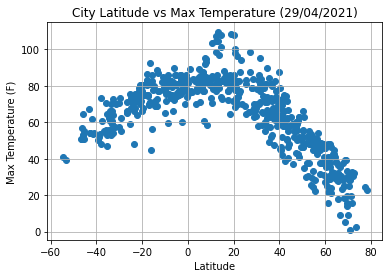

In [55]:
plt.scatter(city_data_df["City Latitude"],city_data_df["City Max Temperature"])
plt.grid()
plt.title("City Latitude vs Max Temperature (29/04/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

### Latitude vs Humidity Plot

Text(0, 0.5, 'Humidity(%)')

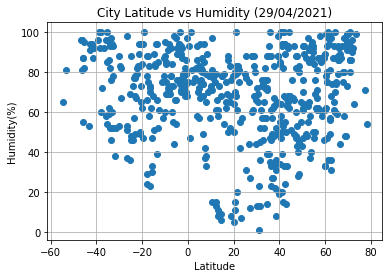

In [56]:
plt.scatter(city_data_df["City Latitude"],city_data_df["City Humidity"])
plt.grid()
plt.title("City Latitude vs Humidity (29/04/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

### Latitude vs Cloudiness Plot

Text(0, 0.5, 'Cloudiness(%)')

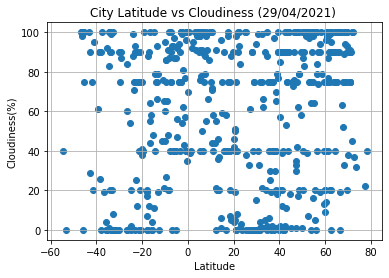

In [57]:
plt.scatter(city_data_df["City Latitude"], city_data_df["City Cloudiness"])
plt.grid()
plt.title("City Latitude vs Cloudiness (29/04/2021) ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

### Latitude vs Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

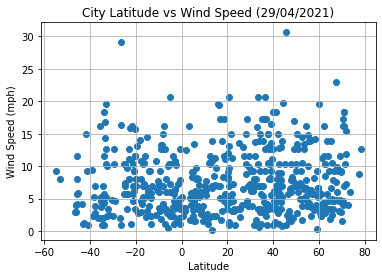

In [58]:
plt.scatter(city_data_df["City Latitude"], city_data_df["City Wind Speed"])
plt.grid()
plt.title("City Latitude vs Wind Speed (29/04/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Linear Regression

### Divide DataFrame into Northern Hemisphere and Souther Hemisphere

In [59]:
northern_city_df = city_data_df.loc[city_data_df["City Latitude"] >= 0]
northern_city_df.head()

,City ID,City Name,Country,City Latitude,City Longitude,City Temperature,City Max Temperature,City Humidity,City Cloudiness,City Wind Speed
3,1154689,Ko Samui,TH,9.5357,99.9357,83.46,83.46,71,100,3.89
4,770425,Janów Lubelski,PL,50.7070,22.4104,60.98,63.00,64,100,5.99
8,1162634,Wana,PK,32.2989,69.5725,65.52,65.52,57,99,13.78
9,3204121,Biograd na Moru,HR,43.9433,15.4519,65.70,66.99,68,40,13.80
12,4031574,Provideniya,RU,64.3833,-173.3000,29.46,29.46,70,100,3.38


In [60]:
southern_city_df = city_data_df.loc[city_data_df["City Latitude"] < 0]
southern_city_df.head()

,City ID,City Name,Country,City Latitude,City Longitude,City Temperature,City Max Temperature,City Humidity,City Cloudiness,City Wind Speed
0,3450909,Rondonópolis,BR,-16.4708,-54.6356,92.28,92.28,23,100,5.17
1,1650232,Banjar,ID,-8.1900,114.9675,80.60,80.60,94,20,6.91
2,4020109,Atuona,PF,-9.8000,-139.0333,78.64,78.64,75,27,7.23
5,4030556,Rikitea,PF,-23.1203,-134.9692,75.61,75.61,68,93,11.16
6,4032243,Vaini,TO,-21.2000,-175.2000,77.00,77.00,94,75,5.75


### Northern Hemisphere - Max Temp vs Latitude Linear Regression

The line equation is y = -0.8x +86.68


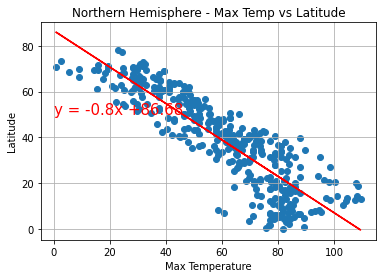

In [75]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_city_df["City Max Temperature"],northern_city_df["City Latitude"])
regress_values = northern_city_df["City Max Temperature"] * slope + intercept

plt.grid()

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The line equation is {line_eq}")

plt.scatter(northern_city_df["City Max Temperature"],northern_city_df["City Latitude"])
plt.plot(northern_city_df["City Max Temperature"], regress_values, "r-")
plt.annotate(line_eq,(0,50), fontsize=15, color="red")

plt.title("Northern Hemisphere - Max Temp vs Latitude")
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
plt.show()

In [76]:
print("Northern Hemisphere - Max Temp vs Latitude")
print(f"The rvalue is {rvalue}")

Northern Hemisphere - Max Temp vs Latitude
The rvalue is -0.8713348126133136


### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The line equation is y = 0.94x +-86.5


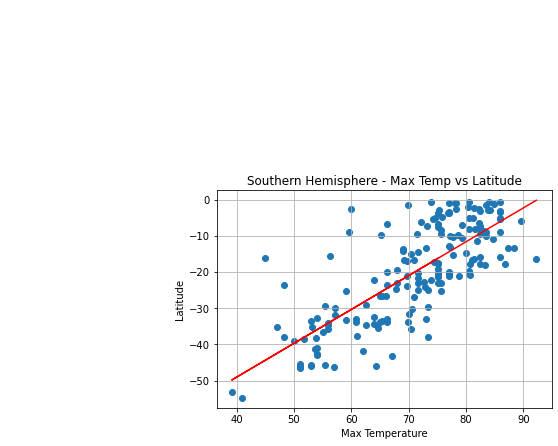

In [77]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_city_df["City Max Temperature"],southern_city_df["City Latitude"])
regress_values = southern_city_df["City Max Temperature"] * slope + intercept

plt.grid()

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The line equation is {line_eq}")

plt.scatter(southern_city_df["City Max Temperature"],southern_city_df["City Latitude"])
plt.plot(southern_city_df["City Max Temperature"], regress_values, "r-")
plt.annotate(line_eq,(0,50), fontsize=15, color="red")

plt.title("Southern Hemisphere - Max Temp vs Latitude")
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
plt.show()

In [78]:
print("Southern Hemisphere - Max Temp vs Latitude")
print(f"The rvalue is {rvalue}")

Southern Hemisphere - Max Temp vs Latitude
The rvalue is 0.7707258497491765


### Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression

The line equation is y = 0.16x +28.11


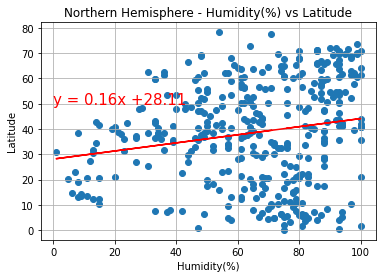

In [79]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_city_df["City Humidity"],northern_city_df["City Latitude"])
regress_values = northern_city_df["City Humidity"] * slope + intercept

plt.grid()

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The line equation is {line_eq}")

plt.scatter(northern_city_df["City Humidity"],northern_city_df["City Latitude"])
plt.plot(northern_city_df["City Humidity"], regress_values, "r-")
plt.annotate(line_eq,(0,50), fontsize=15, color="red")

plt.title("Northern Hemisphere - Humidity(%) vs Latitude")
plt.xlabel("Humidity(%)")
plt.ylabel("Latitude")
plt.show()

In [80]:
print("Northern Hemisphere - Humidity(%) vs Latitude")
print(f"The rvalue is {rvalue}")

Northern Hemisphere - Humidity(%) vs Latitude
The rvalue is 0.18799035156579666


### Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression

The line equation is y = -0.03x +-18.1


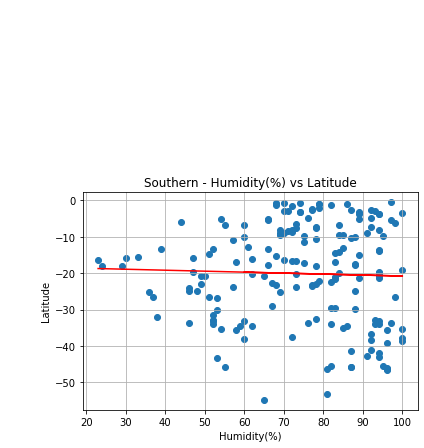

In [81]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_city_df["City Humidity"],southern_city_df["City Latitude"])
regress_values = southern_city_df["City Humidity"] * slope + intercept

plt.grid()

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The line equation is {line_eq}")

plt.scatter(southern_city_df["City Humidity"],southern_city_df["City Latitude"])
plt.plot(southern_city_df["City Humidity"], regress_values, "r-")
plt.annotate(line_eq,(0,50), fontsize=15, color="red")

plt.title("Southern - Humidity(%) vs Latitude")
plt.xlabel("Humidity(%)")
plt.ylabel("Latitude")
plt.show()

In [82]:
print("Southern - Humidity(%) vs Latitude")
print(f"The rvalue is {rvalue}")

Southern - Humidity(%) vs Latitude
The rvalue is -0.03520132544719869


### Northern Hemisphere - Cloudiness (%) vs Latitude Linear Regression

The line equation is y = 0.04x +36.48


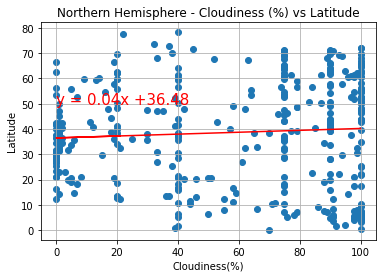

In [84]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_city_df["City Cloudiness"],northern_city_df["City Latitude"])
regress_values = northern_city_df["City Cloudiness"] * slope + intercept

plt.grid()

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The line equation is {line_eq}")

plt.scatter(northern_city_df["City Cloudiness"],northern_city_df["City Latitude"])
plt.plot(northern_city_df["City Cloudiness"], regress_values, "r-")
plt.annotate(line_eq,(0,50), fontsize=15, color="red")

plt.title("Northern Hemisphere - Cloudiness (%) vs Latitude")
plt.xlabel("Cloudiness(%)")
plt.ylabel("Latitude")
plt.show()

In [85]:
print("Northern Hemisphere - Cloudiness (%) vs Latitude")
print(f"The rvalue is {rvalue}")

Northern Hemisphere - Cloudiness (%) vs Latitude
The rvalue is 0.06756798691333887


### Southern Hemisphere - Cloudiness(%) vs Latitude Linear Regression

The line equation is y = 0.04x +-22.55


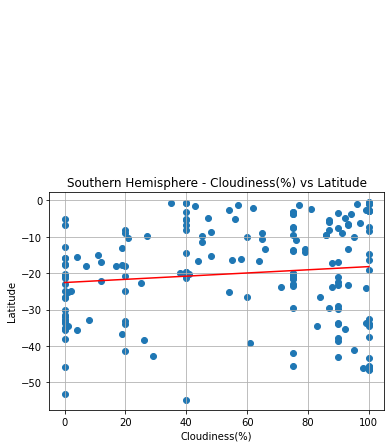

In [86]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_city_df["City Cloudiness"],southern_city_df["City Latitude"])
regress_values = southern_city_df["City Cloudiness"] * slope + intercept

plt.grid()

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The line equation is {line_eq}")

plt.scatter(southern_city_df["City Cloudiness"],southern_city_df["City Latitude"])
plt.plot(southern_city_df["City Cloudiness"], regress_values, "r-")
plt.annotate(line_eq,(0,50), fontsize=15, color="red")

plt.title("Southern Hemisphere - Cloudiness(%) vs Latitude")
plt.xlabel("Cloudiness(%)")
plt.ylabel("Latitude")
plt.show()

In [87]:
print("Southern Hemisphere - Cloudiness(%) vs Latitude")
print(f"The rvalue is {rvalue}")

Southern Hemisphere - Cloudiness(%) vs Latitude
The rvalue is 0.11831618669084566


### Northern Hemisphere - Wind Speed(mph) vs Latitude Linear Regression

The line equation is y = 0.37x +35.9


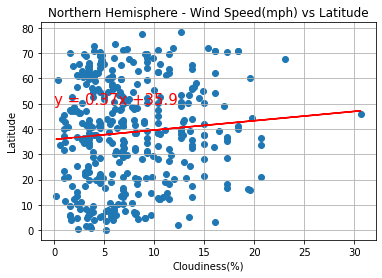

In [88]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_city_df["City Wind Speed"],northern_city_df["City Latitude"])
regress_values = northern_city_df["City Wind Speed"] * slope + intercept

plt.grid()

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The line equation is {line_eq}")

plt.scatter(northern_city_df["City Wind Speed"],northern_city_df["City Latitude"])
plt.plot(northern_city_df["City Wind Speed"], regress_values, "r-")
plt.annotate(line_eq,(0,50), fontsize=15, color="red")

plt.title("Northern Hemisphere - Wind Speed(mph) vs Latitude")
plt.xlabel("Cloudiness(%)")
plt.ylabel("Latitude")
plt.show()

In [89]:
print("Northern Hemisphere - Wind Speed(mph) vs Latitude")
print(f"The rvalue is {rvalue}")

Northern Hemisphere - Wind Speed(mph) vs Latitude
The rvalue is 0.08797799905596106


### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The line equation is y = -0.04x +-19.8


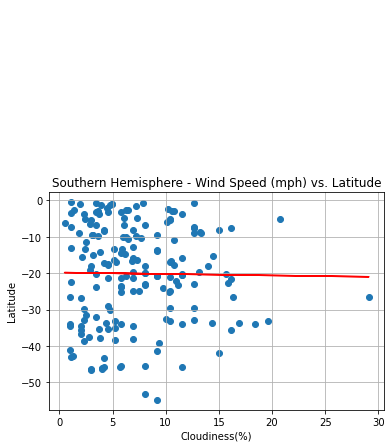

In [90]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_city_df["City Wind Speed"],southern_city_df["City Latitude"])
regress_values = southern_city_df["City Wind Speed"] * slope + intercept

plt.grid()

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The line equation is {line_eq}")

plt.scatter(southern_city_df["City Wind Speed"],southern_city_df["City Latitude"])
plt.plot(southern_city_df["City Wind Speed"], regress_values, "r-")
plt.annotate(line_eq,(0,50), fontsize=15, color="red")

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Cloudiness(%)")
plt.ylabel("Latitude")
plt.show()

In [91]:
print("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
print(f"The rvalue is {rvalue}")

Southern Hemisphere - Wind Speed (mph) vs. Latitude
The rvalue is -0.013721872187115926
